### Assignment 5 classification

Use dataset https://www.kaggle.com/uciml/pima-indians-diabetes-database

Description: 

Pregnancies: Number of times pregnant <br>
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test<br>
BloodPressure: Diastolic blood pressure (mm Hg)<br>
SkinThickness: Triceps skin fold thickness (mm)<br>
Insulin: 2-Hour serum insulin (mu U/ml)<br>
BMI: Body mass index (weight in kg/(height in m)^2)<br>
DiabetesPedigreeFunction: Diabetes pedigree function<br>
Age: Age (years)<br>
Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [38]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# visualize func
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image  
import pydotplus
from sklearn import metrics

import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

def visualize_tree(tree, name):
    """StringIO(): creates an object (empty in this case) to receive a string buffer (the tree will be created first as a string before as an image) in DOT (graph description language) format."""
    dot_data = StringIO()
    """export_graphviz(): exports the tree in DOT format, generating a representation of the decision tree, which is written into the ‘out_file’."""
    export_graphviz(tree, out_file = dot_data)
    """graph_from_dot_data(): will use the DOT object to create the graph."""
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png("./"+ name +".png")
    Image(graph.create_png())


In [39]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
data = pd.read_csv("./data/diabetes.csv", header=0, names=col_names)
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Decision tree classification

In [40]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = data[feature_cols] # Features
y = data.label # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

tree = []
pred = []

tree1 = DecisionTreeClassifier()
tree1 = tree1.fit(X_train,y_train)
pred1 = tree1.predict(X_test)
print("Dicision tree Accuracy:",metrics.accuracy_score(y_test, pred1))
visualize_tree(tree1, "original")

Dicision tree Accuracy: 0.670995670995671


In [41]:
tree2 = DecisionTreeClassifier(criterion='gini', max_depth = 7)
tree2.fit(X_train, y_train)
pred2 = tree2.predict(X_test)
print('Dicision tree, Criterion = gini Accuracy:', accuracy_score(y_test, pred2))
visualize_tree(tree2, "gini")
print(metrics.classification_report(pred2, y_test))

Dicision tree, Criterion = gini Accuracy: 0.7316017316017316
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       166
           1       0.52      0.68      0.59        65

   micro avg       0.73      0.73      0.73       231
   macro avg       0.69      0.71      0.69       231
weighted avg       0.76      0.73      0.74       231



In [42]:
tree3 = DecisionTreeClassifier(criterion='entropy', max_depth = 7, splitter='random')
tree3.fit(X_train, y_train)
pred3 = tree3.predict(X_test)
print('Dicision tree, Criterion = entropy Accuracy:', accuracy_score(y_test, pred3))
visualize_tree(tree3, "entropy")
print(metrics.classification_report(pred3, y_test))

Dicision tree, Criterion = entropy Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.89      0.76      0.82       171
           1       0.52      0.73      0.61        60

   micro avg       0.75      0.75      0.75       231
   macro avg       0.70      0.75      0.71       231
weighted avg       0.79      0.75      0.76       231



In [43]:
Rtree = RandomForestClassifier(criterion = 'entropy', max_depth=4, random_state=0)
Rtree.fit(X_train, y_train)
Rpred = Rtree.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, Rpred))
print(metrics.classification_report(Rpred, y_test))

Random Forest Accuracy: 0.7835497835497836
              precision    recall  f1-score   support

           0       0.87      0.80      0.84       158
           1       0.64      0.74      0.68        73

   micro avg       0.78      0.78      0.78       231
   macro avg       0.75      0.77      0.76       231
weighted avg       0.80      0.78      0.79       231



In [44]:
from sklearn.metrics import confusion_matrix

# confusion matrix need type list as input 
y_test_list = y_test.tolist() 

pred_list = []
pred_list.append(pred1.tolist())
pred_list.append(pred2.tolist())
pred_list.append(pred3.tolist())
pred_list.append(Rpred.tolist())

### Consufion Matrix

In [45]:
for i in range(4):
    tn, fp, fn, tp = confusion_matrix(y_test_list, pred_list[i]).ravel() # binary case
    if(i==0): print("Original decision tree:")
    elif(i==1): print("Gini decision tree:")
    elif(i==2): print("Entropy decision tree:")
    else: print("Random forest:")
    print("TP:", tp, "TN:",tn, "FP:",fp,"FN:" ,fn)

Original decision tree:
TP: 41 TN: 114 FP: 32 FN: 44
Gini decision tree:
TP: 44 TN: 125 FP: 21 FN: 41
Entropy decision tree:
TP: 44 TN: 130 FP: 16 FN: 41
Random forest:
TP: 54 TN: 127 FP: 19 FN: 31


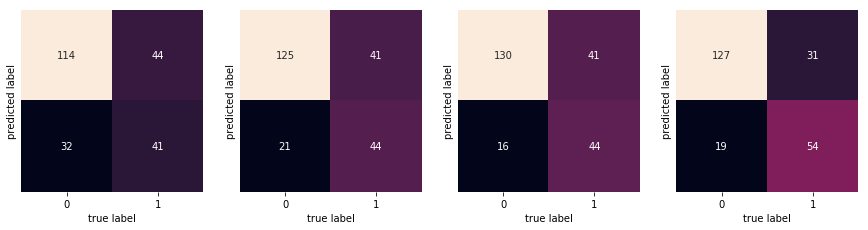

In [46]:
import seaborn  as sns
import matplotlib.pyplot as plt

ax = []
f, ax = plt.subplots(1,4, figsize = (15,10))

for i in range(4):
    g1 = sns.heatmap(confusion_matrix(y_test_list, pred_list[i]).T, square=True, annot=True, fmt='d', cbar=False,ax=ax[i])
    g1.set_ylabel('predicted label')
    g1.set_xlabel('true label')
    g1.set_yticks([])

plt.show()

###  Present the results of the classification

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.preprocessing import OneHotEncoder

In [48]:
# split data into 2 part by class (pos/neg)
neg = data[data['label'] == 0]
pos = data[data['label'] == 1]

def show_info_in_diff_classes(data,Class, X_train, X_test, y_train, y_test, y_score, tree):
    
    tree = tree.fit(X_train, y_train)
    pred = tree.predict(X_test)
    pred_list = pred.tolist()
    y_test_list = y_test.tolist() 
    tn, fp, fn, tp = confusion_matrix(y_test_list, pred_list).ravel() # binary case
    y_test = pd.DataFrame(y_test)
    # need to transform y_test label into one hot encoding
    onehotencoder = OneHotEncoder(categorical_features = [0])
    ohe_data = onehotencoder.fit_transform(y_test).toarray() 
    ohe_data = np.array(ohe_data)
    
    roc_area = roc_auc_score(ohe_data, y_score)
    prc_area = average_precision_score(ohe_data, y_score)
    
    d = {'samples': len(data), 'classes': Class, 'attributes': 8,
          'TP':tp, 'TN':tn, 'FP':fp, 'FN':fn, 'ROC area': roc_area, 'PRC area': prc_area}

    df = pd.DataFrame(d, index=[0])
    return df
    

In [49]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
# process data first
X = pos[feature_cols] # Features
y = pos.label # Target variable
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=1)

X = neg[feature_cols] # Features
y = neg.label # Target variable
X_train0, X_test0, y_train0, y_test0 = train_test_split(X, y, test_size=0.3, random_state=1)

#pd.DataFrame.from_dict(data)
res1 = show_info_in_diff_classes(pos,"pos", X_train, X_test, y_train, y_test, tree1.predict_proba(X_test), tree1)
res2 = show_info_in_diff_classes(pos,"pos", X_train, X_test, y_train, y_test, tree2.predict_proba(X_test), tree2)
res3 = show_info_in_diff_classes(pos,"pos", X_train, X_test, y_train, y_test, tree3.predict_proba(X_test), tree3)
res4 = show_info_in_diff_classes(pos,"pos", X_train, X_test, y_train, y_test, Rtree.predict_proba(X_test), Rtree)

frames = [res1, res2, res3, res4]
result_pos = pd.concat(frames)
result_pos.insert(loc=0, column='Tree type', value=['Original','Gini', 'Entropy', 'Random Forest'])
print(result_pos.to_string(index=False))
print('\n')    

res5 = show_info_in_diff_classes(neg,"neg", X_train, X_test, y_train, y_test, tree1.predict_proba(X_test), tree1)
res6 = show_info_in_diff_classes(neg,"neg", X_train, X_test, y_train, y_test, tree2.predict_proba(X_test), tree2)
res7 = show_info_in_diff_classes(neg,"neg", X_train, X_test, y_train, y_test, tree3.predict_proba(X_test), tree3)
res8 = show_info_in_diff_classes(neg,"neg", X_train, X_test, y_train, y_test, Rtree.predict_proba(X_test), Rtree)

frames = [res5, res6, res7, res8]
result_neg = pd.concat(frames)
result_neg.insert(loc=0, column='Tree type', value=['Original','Gini', 'Entropy', 'Random Forest'])
print(result_neg.to_string(index=False))

     Tree type  samples classes  attributes  TP   TN  FP  FN  ROC area  PRC area
      Original      268     pos           8  44  113  33  41  0.631587  0.581646
          Gini      268     pos           8  41  125  21  44  0.725544  0.682969
       Entropy      268     pos           8  50  112  34  35  0.758340  0.708570
 Random Forest      268     pos           8  54  127  19  31  0.847703  0.838684


     Tree type  samples classes  attributes  TP   TN  FP  FN  ROC area  PRC area
      Original      500     neg           8  39  116  30  46  0.645810  0.592030
          Gini      500     neg           8  40  125  21  45  0.698832  0.660091
       Entropy      500     neg           8  36  136  10  49  0.682434  0.629838
 Random Forest      500     neg           8  54  127  19  31  0.847703  0.838684


### ROC curve 

In [50]:
y_test = pd.DataFrame(y_test)
# need to transform y_test label into one hot encoding
onehotencoder = OneHotEncoder(categorical_features = [0])
ohe_data = onehotencoder.fit_transform(y_test).toarray() 
ohe_data = np.array(ohe_data)


def plot_ROC(y_score, title):

    n_classes = 2
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(ohe_data[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(ohe_data.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    lw = 2
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()


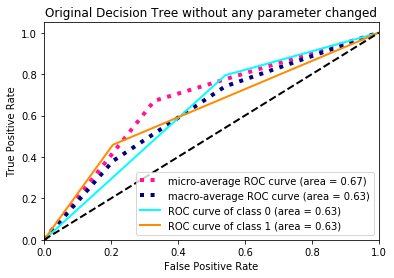

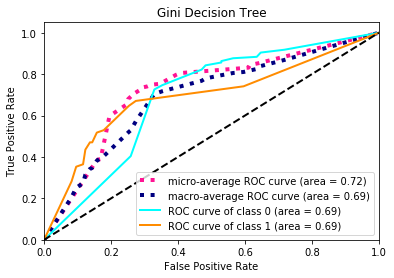

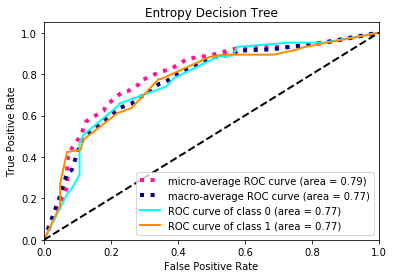

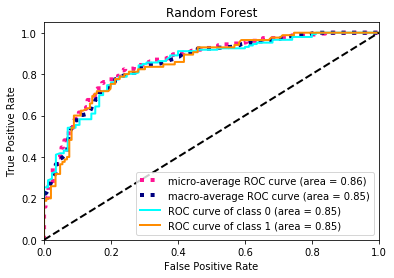

In [51]:
plot_ROC(tree1.predict_proba(X_test), "Original Decision Tree without any parameter changed")
plot_ROC(tree2.predict_proba(X_test), "Gini Decision Tree")
plot_ROC(tree3.predict_proba(X_test), "Entropy Decision Tree")
plot_ROC(Rtree.predict_proba(X_test), "Random Forest")

### Result Analyzation